# Loading the relevant packages

In [100]:
# import the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # used for encoding categorical data
from sklearn.preprocessing import StandardScaler # used for feature scaling
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import classification_report
  

In [2]:
# Checking the working directory
os.getcwd()

'C:\\Users\\Diana Gathema\\Documents\\Python Scripts\\Customer churn exercise'

# Loading the data into python

In [3]:
# load the files
data=pd.read_csv("train.csv")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,Monthly_Charge_Band,Tenure_in_Years
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No,"(20,40]",0-1
1,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,"(40,60]",0-1
2,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes,"(60,80]",0-1
3,9305-CDSKC,Female,0,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,Yes,"(80,100]",0-1
4,1452-KIOVK,Male,0,No,Yes,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),No,"(80,100]",1-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No,"(80,100]",1-2
5630,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No,[100+),0-0
5631,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No,"(20,40]",0-1
5632,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,"(60,80]",0-1


Checking the number of rows and columns

In [4]:
# returning the no of rows and cols
data.shape

(5634, 20)

In [5]:
# returning the first 5 rows
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,Monthly_Charge_Band,Tenure_in_Years
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No,"(20,40]",0-1
1,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,"(40,60]",0-1
2,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes,"(60,80]",0-1
3,9305-CDSKC,Female,0,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,Yes,"(80,100]",0-1
4,1452-KIOVK,Male,0,No,Yes,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),No,"(80,100]",1-2


In [6]:
# returning more info on the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   customerID           5634 non-null   object
 1   gender               5634 non-null   object
 2   SeniorCitizen        5634 non-null   int64 
 3   Partner              5634 non-null   object
 4   Dependents           5634 non-null   object
 5   PhoneService         5634 non-null   object
 6   MultipleLines        5634 non-null   object
 7   InternetService      5634 non-null   object
 8   OnlineSecurity       5634 non-null   object
 9   OnlineBackup         5634 non-null   object
 10  DeviceProtection     5634 non-null   object
 11  TechSupport          5634 non-null   object
 12  StreamingTV          5634 non-null   object
 13  StreamingMovies      5634 non-null   object
 14  Contract             5634 non-null   object
 15  PaperlessBilling     5634 non-null   object
 16  Paymen

# Preparing the data

Checking for missing data values

In [7]:
# Display number of missing values per column
data.isna().sum()

customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
Churn                  0
Monthly_Charge_Band    0
Tenure_in_Years        0
dtype: int64

# Analysing the data

In [8]:
#Check the count for each category in the "churn" column
data["Churn"].value_counts()

No     4157
Yes    1477
Name: Churn, dtype: int64

# Bivariate Analysis

Found the sol here:https://medium.com/swlh/how-to-create-percentage-plots-for-visualizing-your-data-in-python-f0d894d7c7bb

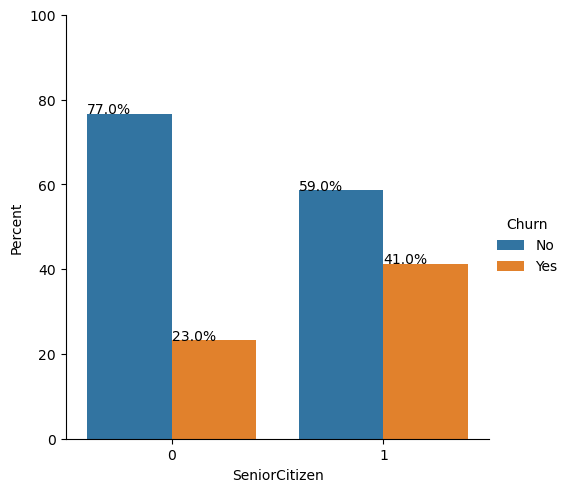

In [9]:
new_df = data.groupby("SeniorCitizen")["Churn"].value_counts(normalize=True)
new_df = new_df.mul(100).rename('Percent').reset_index()
new_df
g = sns.catplot(x="SeniorCitizen", y='Percent', hue="Churn",kind="bar",data=new_df)
g.ax.set_ylim(0,100)
for p in g.ax.patches:
    txt = str(p.get_height().round(0)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)


##### Customers who are senior citizens are more likely to churn.

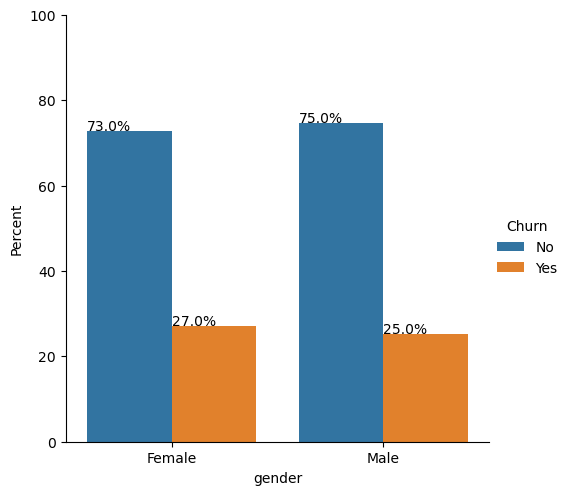

In [10]:
new_df1 = data.groupby("gender")["Churn"].value_counts(normalize=True)
new_df1 = new_df1.mul(100).rename('Percent').reset_index()
new_df1
h = sns.catplot(x="gender", y='Percent', hue="Churn",kind="bar",data=new_df1)
h.ax.set_ylim(0,100)
for p in h.ax.patches:
    txt = str(p.get_height().round(0)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    h.ax.text(txt_x,txt_y,txt)


##### The % of males and females churning is not significantly different

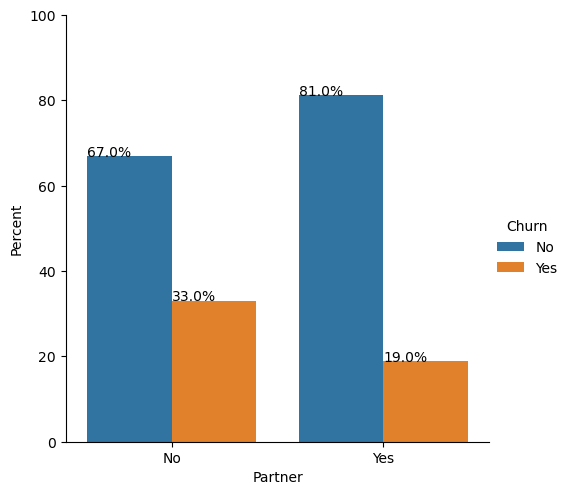

In [11]:
new_df2 = data.groupby("Partner")["Churn"].value_counts(normalize=True)
new_df2 = new_df2.mul(100).rename('Percent').reset_index()
new_df2
i = sns.catplot(x="Partner", y='Percent', hue="Churn",kind="bar",data=new_df2)
i.ax.set_ylim(0,100)
for p in i.ax.patches:
    txt = str(p.get_height().round(0)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    i.ax.text(txt_x,txt_y,txt)


#### Customers who have no partners are more likely to churn.

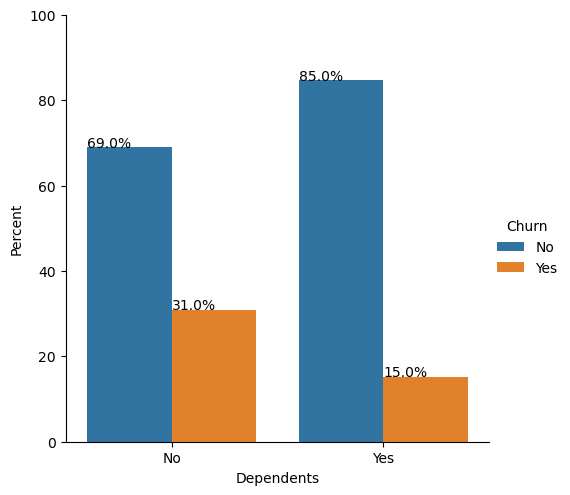

In [12]:
new_df3 = data.groupby("Dependents")["Churn"].value_counts(normalize=True)
new_df3 = new_df3.mul(100).rename('Percent').reset_index()
new_df3
j = sns.catplot(x="Dependents", y='Percent', hue="Churn",kind="bar",data=new_df3)
j.ax.set_ylim(0,100)
for p in j.ax.patches:
    txt = str(p.get_height().round(0)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    j.ax.text(txt_x,txt_y,txt)


#### Customers who had no dependents were more likely to churn.

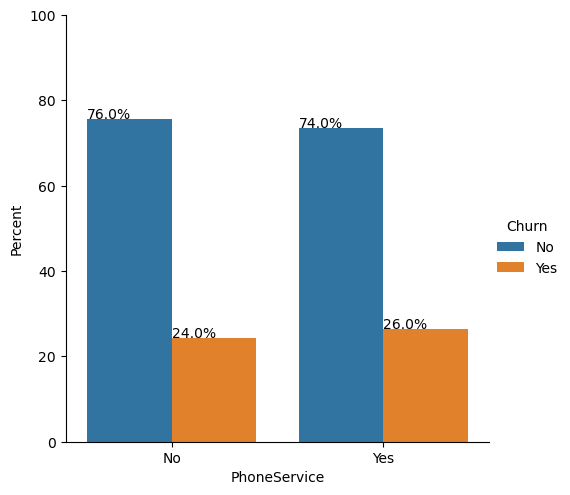

In [13]:
new_df4 = data.groupby("PhoneService")["Churn"].value_counts(normalize=True)
new_df4 = new_df4.mul(100).rename('Percent').reset_index()
new_df4
k = sns.catplot(x="PhoneService", y='Percent', hue="Churn",kind="bar",data=new_df4)
k.ax.set_ylim(0,100)
for p in k.ax.patches:
    txt = str(p.get_height().round(0)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    k.ax.text(txt_x,txt_y,txt)

#### The % of customers with and without phone service who are churning is not significantly different

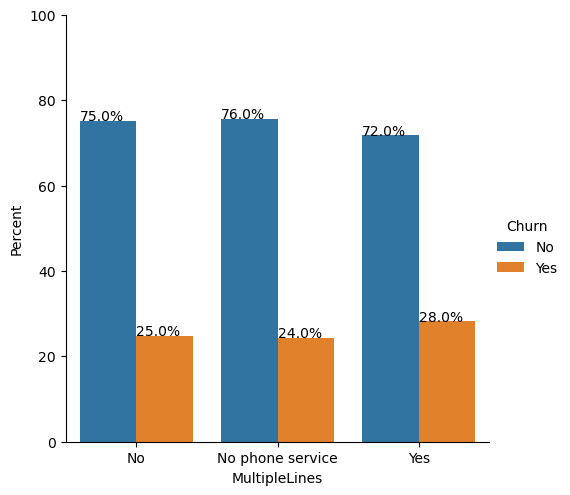

In [14]:
new_df4 = data.groupby("MultipleLines")["Churn"].value_counts(normalize=True)
new_df4 = new_df4.mul(100).rename('Percent').reset_index()
new_df4
l = sns.catplot(x="MultipleLines", y='Percent', hue="Churn",kind="bar",data=new_df4)
l.ax.set_ylim(0,100)
for p in l.ax.patches:
    txt = str(p.get_height().round(0)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    l.ax.text(txt_x,txt_y,txt)

#### Customers who had multiple lines were more likely to churn

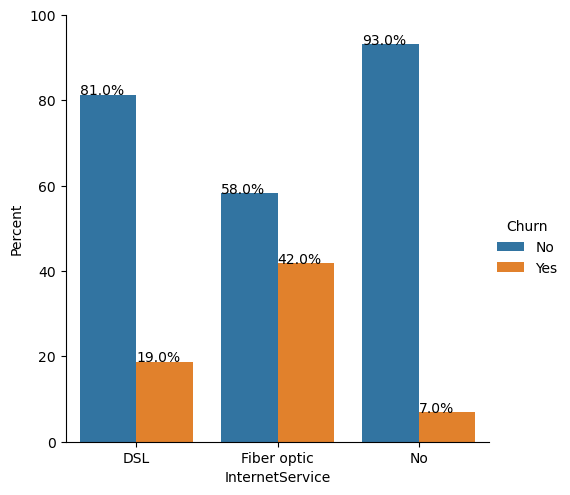

In [15]:
new_df5 = data.groupby("InternetService")["Churn"].value_counts(normalize=True)
new_df5 = new_df5.mul(100).rename('Percent').reset_index()
new_df5
m = sns.catplot(x="InternetService", y='Percent', hue="Churn",kind="bar",data=new_df5)
m.ax.set_ylim(0,100)
for p in m.ax.patches:
    txt = str(p.get_height().round(0)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    m.ax.text(txt_x,txt_y,txt)

#### Customers who are using fiber optic are more likely to churn.

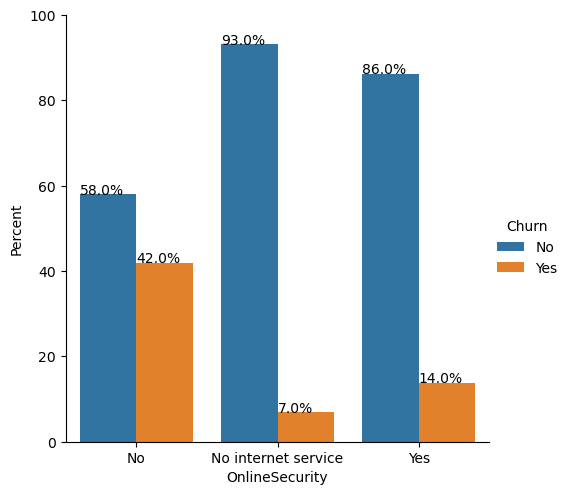

In [16]:
new_df6 = data.groupby("OnlineSecurity")["Churn"].value_counts(normalize=True)
new_df6 = new_df6.mul(100).rename('Percent').reset_index()
new_df6
n = sns.catplot(x="OnlineSecurity", y='Percent', hue="Churn",kind="bar",data=new_df6)
n.ax.set_ylim(0,100)
for p in n.ax.patches:
    txt = str(p.get_height().round(0)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    n.ax.text(txt_x,txt_y,txt)

#### Customers with no online security were more likely to churn

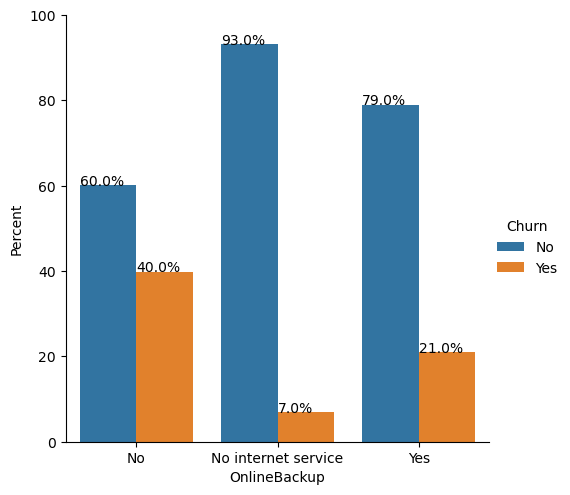

In [17]:
new_df7 = data.groupby("OnlineBackup")["Churn"].value_counts(normalize=True)
new_df7 = new_df7.mul(100).rename('Percent').reset_index()
new_df7
o = sns.catplot(x="OnlineBackup", y='Percent', hue="Churn",kind="bar",data=new_df7)
o.ax.set_ylim(0,100)
for p in o.ax.patches:
    txt = str(p.get_height().round(0)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    o.ax.text(txt_x,txt_y,txt)

#### Customers who have no online backup were more likely to churn

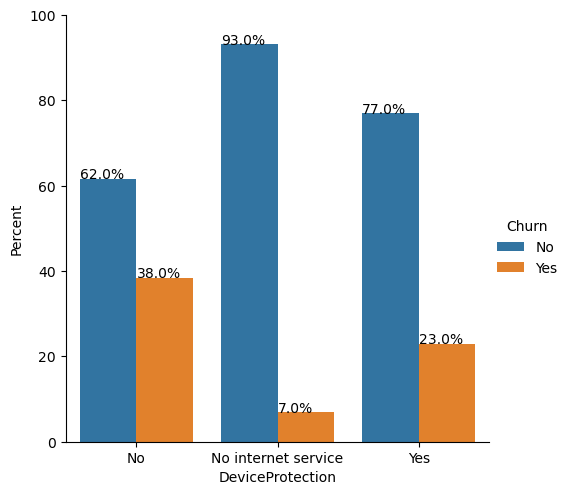

In [18]:
new_df8 = data.groupby("DeviceProtection")["Churn"].value_counts(normalize=True)
new_df8 = new_df8.mul(100).rename('Percent').reset_index()
new_df8
q = sns.catplot(x="DeviceProtection", y='Percent', hue="Churn",kind="bar",data=new_df8)
q.ax.set_ylim(0,100)
for p in q.ax.patches:
    txt = str(p.get_height().round(0)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    q.ax.text(txt_x,txt_y,txt)

#### Customers who had no device protection were more likely to churn

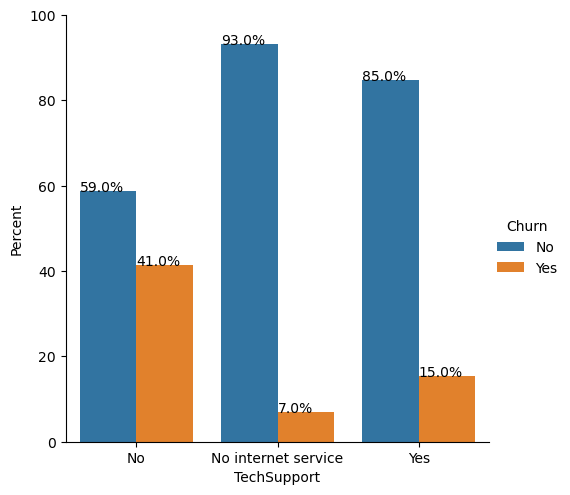

In [19]:
new_df9 = data.groupby("TechSupport")["Churn"].value_counts(normalize=True)
new_df9 = new_df9.mul(100).rename('Percent').reset_index()
new_df9
r = sns.catplot(x="TechSupport", y='Percent', hue="Churn",kind="bar",data=new_df9)
r.ax.set_ylim(0,100)
for p in r.ax.patches:
    txt = str(p.get_height().round(0)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    r.ax.text(txt_x,txt_y,txt)

#### Customers who had no tech support were more likely to churn.

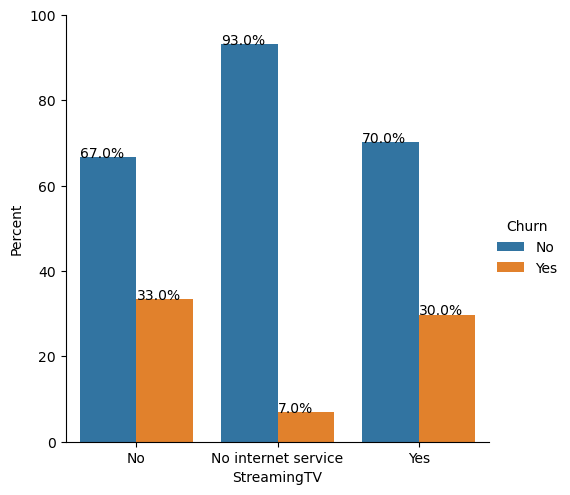

In [20]:
new_df10 = data.groupby("StreamingTV")["Churn"].value_counts(normalize=True)
new_df10 = new_df10.mul(100).rename('Percent').reset_index()
new_df10
s = sns.catplot(x="StreamingTV", y='Percent', hue="Churn",kind="bar",data=new_df10)
s.ax.set_ylim(0,100)
for p in s.ax.patches:
    txt = str(p.get_height().round(0)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    s.ax.text(txt_x,txt_y,txt)

#### Customers who were not streaming tv were more likely to churn.

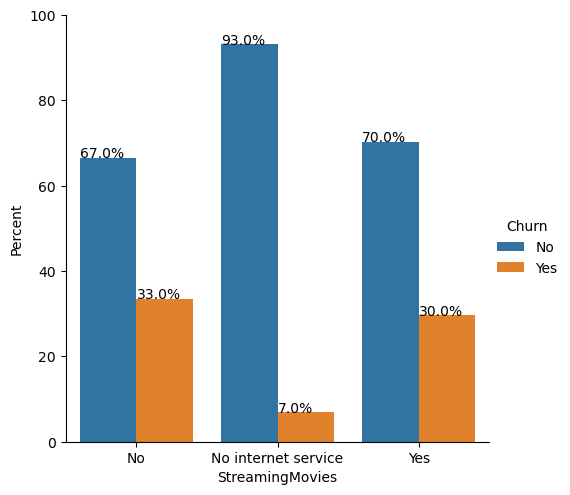

In [21]:
new_df11 = data.groupby("StreamingMovies")["Churn"].value_counts(normalize=True)
new_df11 = new_df11.mul(100).rename('Percent').reset_index()
new_df11
t = sns.catplot(x="StreamingMovies", y='Percent', hue="Churn",kind="bar",data=new_df11)
t.ax.set_ylim(0,100)
for p in t.ax.patches:
    txt = str(p.get_height().round(0)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    t.ax.text(txt_x,txt_y,txt)

#### Customers who are not streaming movies are more likely to churn.

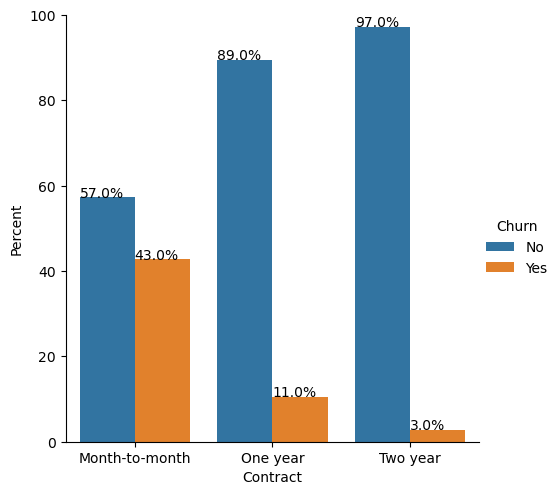

In [22]:
new_df12 = data.groupby("Contract")["Churn"].value_counts(normalize=True)
new_df12 = new_df12.mul(100).rename('Percent').reset_index()
new_df12
u = sns.catplot(x="Contract", y='Percent', hue="Churn",kind="bar",data=new_df12)
u.ax.set_ylim(0,100)
for p in u.ax.patches:
    txt = str(p.get_height().round(0)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    u.ax.text(txt_x,txt_y,txt)

#### Customers on shorter contracts were more likely to churn.

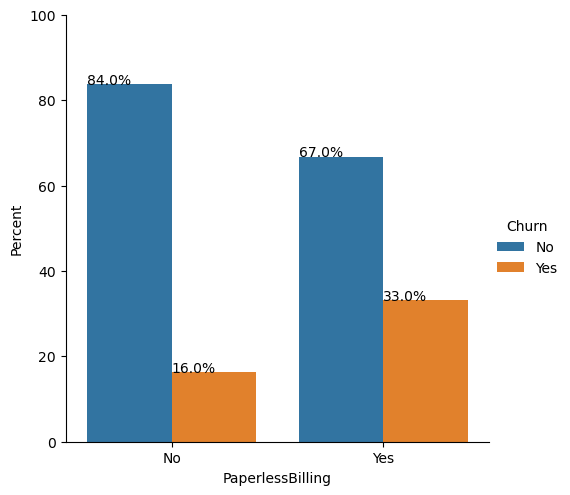

In [23]:
new_df13 = data.groupby("PaperlessBilling")["Churn"].value_counts(normalize=True)
new_df13 = new_df13.mul(100).rename('Percent').reset_index()
new_df13
v = sns.catplot(x="PaperlessBilling", y='Percent', hue="Churn",kind="bar",data=new_df13)
v.ax.set_ylim(0,100)
for p in v.ax.patches:
    txt = str(p.get_height().round(0)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    v.ax.text(txt_x,txt_y,txt)

#### Customers who had paperless billing were more likely to churn.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Bank transfer (automatic)'),
  Text(1, 0, 'Credit card (automatic)'),
  Text(2, 0, 'Electronic check'),
  Text(3, 0, 'Mailed check')])

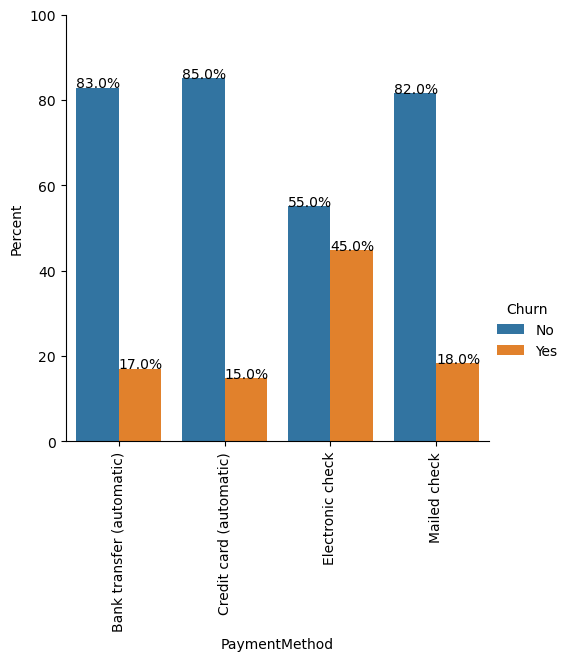

In [24]:
new_df14 = data.groupby("PaymentMethod")["Churn"].value_counts(normalize=True)
new_df14 = new_df14.mul(100).rename('Percent').reset_index()
new_df14
w = sns.catplot(x="PaymentMethod", y='Percent', hue="Churn",kind="bar",data=new_df14)
w.ax.set_ylim(0,100)
for p in w.ax.patches:
    txt = str(p.get_height().round(0)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    w.ax.text(txt_x,txt_y,txt)
    
# rotating the x axis labels
plt.xticks(rotation=90)

#### Customers who made payment through electronic check more likely to churn.

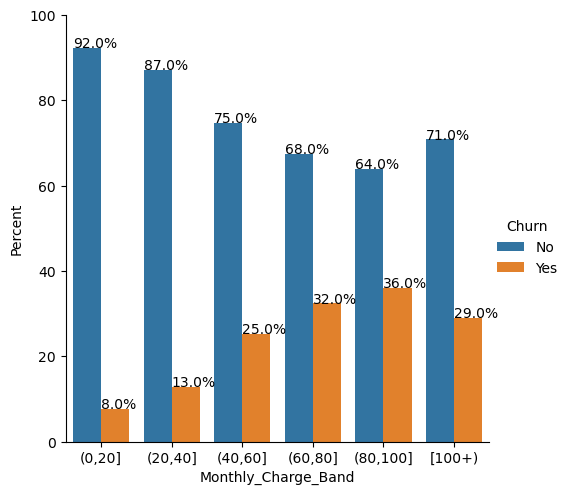

In [25]:
new_df15 = data.groupby("Monthly_Charge_Band")["Churn"].value_counts(normalize=True)
new_df15 = new_df15.mul(100).rename('Percent').reset_index()
new_df15
y = sns.catplot(x="Monthly_Charge_Band", y='Percent', hue="Churn",kind="bar",data=new_df15)
y.ax.set_ylim(0,100)
for p in y.ax.patches:
    txt = str(p.get_height().round(0)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    y.ax.text(txt_x,txt_y,txt)

#### The churn rate increases as the monthly charge band increases.

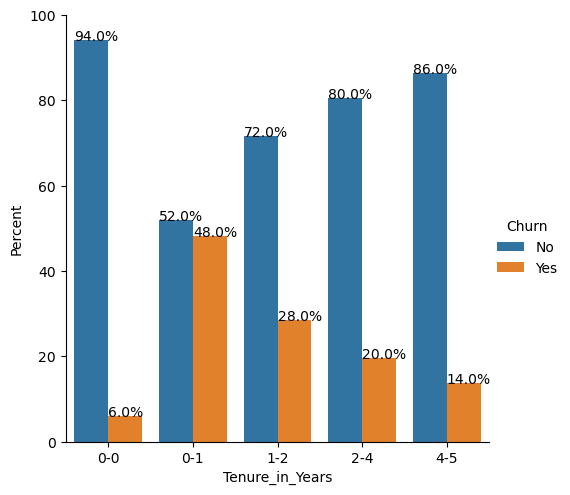

In [26]:
new_df16 = data.groupby("Tenure_in_Years")["Churn"].value_counts(normalize=True)
new_df16 = new_df16.mul(100).rename('Percent').reset_index()
new_df16
z = sns.catplot(x="Tenure_in_Years", y='Percent', hue="Churn",kind="bar",data=new_df16)
z.ax.set_ylim(0,100)
for p in z.ax.patches:
    txt = str(p.get_height().round(0)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    z.ax.text(txt_x,txt_y,txt)

#### Customers with a tenure of 0-1 years are more likely to churn.

# Multivariate analysis

Text(0, 0.5, 'Percentage of Customers')

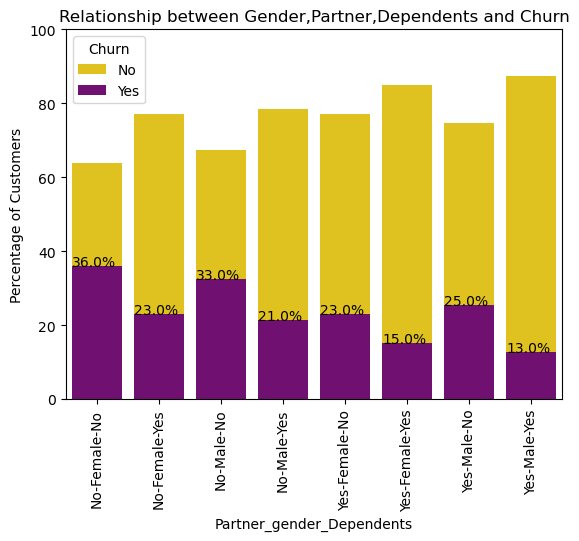

In [27]:
#Checking on the relationship between churn,gender,partner,gender and dependents

# grouping the data
# normalize=true -returns proportions
df1 = data.groupby(["Partner","gender","Dependents"])["Churn"].value_counts(normalize=True)
df1
df1 =df1.mul(100).rename('Percent').reset_index()

#combines the partner,gender and dependents columns
df1['Partner_gender_Dependents'] = df1[['Partner', 'gender',"Dependents"]].apply(lambda x: '-'.join(x), axis=1)
df1


# dodge makes it a stacked bar plot
a = sns.barplot(x="Partner_gender_Dependents", y='Percent', hue="Churn",dodge=False,data=df1,palette={"No":"Gold","Yes":"Purple"})

#set the ylimit 
a.set_ylim(0,100)

# annotate the bar plot
for p in a.containers[1]:
    txt = str(p.get_height().round(0)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    plt.text(txt_x,txt_y,txt)

# rotating the x axis labels
plt.xticks(rotation=90)

# labelling
plt.title("Relationship between Gender,Partner,Dependents and Churn")
plt.ylabel("Percentage of Customers")


Text(0, 0.5, 'Percentage of Customers')

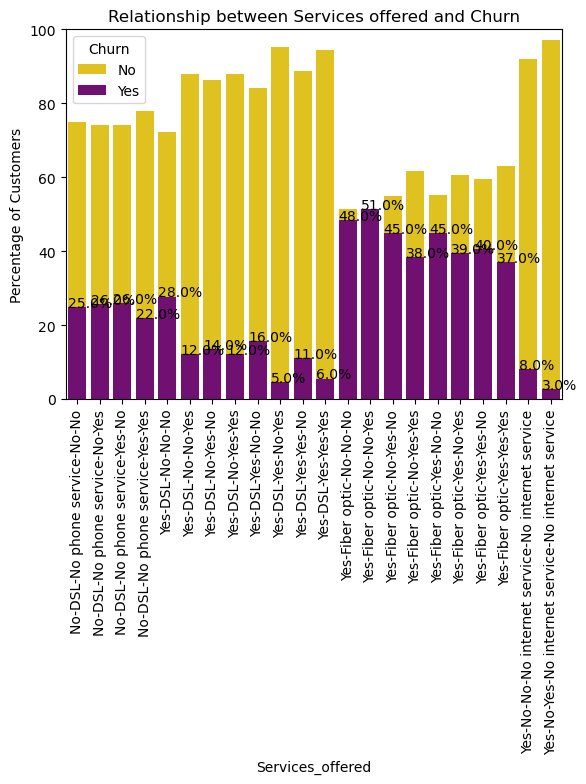

In [28]:
#Checking on the relationship between types of service offered: PhoneService,InternetService,MultipleLines,SteamingMovies,streamingTV

# grouping the data
df1 = data.groupby(["PhoneService","InternetService","MultipleLines","StreamingMovies","StreamingTV"])["Churn"].value_counts(normalize=True)
df1
df1 =df1.mul(100).rename('Percent').reset_index()
df1['Services_offered'] = df1[['PhoneService', 'InternetService',"MultipleLines","StreamingMovies","StreamingTV"]].apply(lambda x: '-'.join(x), axis=1)
df1

a = sns.barplot(x="Services_offered", y='Percent', hue="Churn",dodge=False,data=df1,palette={"No":"Gold","Yes":"Purple"})

#set the ylimit 
a.set_ylim(0,100)

for p in a.containers[1]:
    txt = str(p.get_height().round(0)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    plt.text(txt_x,txt_y,txt)

# rotating the x axis labels
plt.xticks(rotation=90)

# labelling
plt.title("Relationship between Services offered and Churn")
plt.ylabel("Percentage of Customers")




## Data preprocessing

##### Encoding

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   customerID           5634 non-null   object
 1   gender               5634 non-null   object
 2   SeniorCitizen        5634 non-null   int64 
 3   Partner              5634 non-null   object
 4   Dependents           5634 non-null   object
 5   PhoneService         5634 non-null   object
 6   MultipleLines        5634 non-null   object
 7   InternetService      5634 non-null   object
 8   OnlineSecurity       5634 non-null   object
 9   OnlineBackup         5634 non-null   object
 10  DeviceProtection     5634 non-null   object
 11  TechSupport          5634 non-null   object
 12  StreamingTV          5634 non-null   object
 13  StreamingMovies      5634 non-null   object
 14  Contract             5634 non-null   object
 15  PaperlessBilling     5634 non-null   object
 16  Paymen

In [31]:
# Dropping customerID column that not required in our modelling
data.drop(columns="customerID",inplace=True)
data.head()


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,Monthly_Charge_Band,Tenure_in_Years
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No,"(20,40]",0-1
1,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,"(40,60]",0-1
2,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes,"(60,80]",0-1
3,Female,0,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,Yes,"(80,100]",0-1
4,Male,0,No,Yes,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),No,"(80,100]",1-2


In [32]:
data["gender"].unique()

array(['Female', 'Male'], dtype=object)

In [33]:
data.describe(include="all")

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,Monthly_Charge_Band,Tenure_in_Years
count,5634,5634.000000,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634
unique,2,NaN,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2,6,5
top,Male,NaN,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No,"(80,100]",0-1
freq,2826,NaN,2919,3932,5087,2692,2462,2788,2476,2459,2759,2247,2231,3074,3313,1895,4157,1406,1740
mean,NaN,0.160809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.367388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
#splitting into the independent and dependent ("Churn")
x=data.drop("Churn",axis=1)
y=data["Churn"]

In [52]:
# One hot encoding
# creating a function that uses the get_dummies()feature in pandas
def one_hot_encoder_two(data,feature,keep_first=True):

    one_hot_cols = pd.get_dummies(data[feature])
    
    for col in one_hot_cols.columns:
        one_hot_cols.rename({col:f'{feature}_'+col},axis=1,inplace=True)
    
    new_data = pd.concat([data,one_hot_cols],axis=1)
    new_data.drop(feature,axis=1,inplace=True)
    
    if keep_first == False:
        new_data=new_data.iloc[:,1:]
    
    return new_data

In [54]:
#data.select_dtypes(include='O').columns- returns the variables/columns that are objects/categorical data

#running a loop to convert all categorical data to numerical using one hot encoding
x_train=x.copy()
for col in x.select_dtypes(include='O').columns:
   x_train=one_hot_encoder_two(x_train,col)

In [55]:
x_train

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,"Monthly_Charge_Band_(20,40]","Monthly_Charge_Band_(40,60]","Monthly_Charge_Band_(60,80]","Monthly_Charge_Band_(80,100]",Monthly_Charge_Band_[100+),Tenure_in_Years_0-0,Tenure_in_Years_0-1,Tenure_in_Years_1-2,Tenure_in_Years_2-4,Tenure_in_Years_4-5
0,0,1,0,0,1,1,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
1,0,0,1,1,0,1,0,0,1,1,...,0,1,0,0,0,0,1,0,0,0
2,0,1,0,1,0,1,0,0,1,1,...,0,0,1,0,0,0,1,0,0,0
3,0,1,0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
4,0,0,1,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0,0,1,0,1,0,1,0,1,0,...,0,0,0,1,0,0,0,1,0,0
5630,0,1,0,0,1,0,1,0,1,0,...,0,0,0,0,1,1,0,0,0,0
5631,0,1,0,0,1,0,1,1,0,0,...,1,0,0,0,0,0,1,0,0,0
5632,1,0,1,0,1,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0


In [57]:
# Label encoding for y variable
le = LabelEncoder()
y_train = y.copy()
#for col in y_train.select_dtypes(include='O').columns:
 # y_train[col]=le.fit_transform(y_train[col])

In [58]:
 y_train=le.fit_transform(y_train)

In [59]:
y_train

array([0, 1, 1, ..., 0, 1, 0])

### Data preprocessing for test data

In [77]:
# Load data 
test_data=pd.read_csv("test.csv")
test_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,Monthly_Charge_Band,Tenure_in_Years
0,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No,"(40,60]",2-4
1,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No,"(40,60]",2-4
2,8091-TTVAX,Male,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Credit card (automatic),No,[100+),4-5
3,4183-MYFRB,Female,0,No,No,Yes,No,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,No,"(80,100]",1-2
4,6467-CHFZW,Male,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,Yes,"(80,100]",2-4


In [78]:
# check for missing data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   customerID           1409 non-null   object
 1   gender               1409 non-null   object
 2   SeniorCitizen        1409 non-null   int64 
 3   Partner              1409 non-null   object
 4   Dependents           1409 non-null   object
 5   PhoneService         1409 non-null   object
 6   MultipleLines        1409 non-null   object
 7   InternetService      1409 non-null   object
 8   OnlineSecurity       1409 non-null   object
 9   OnlineBackup         1409 non-null   object
 10  DeviceProtection     1409 non-null   object
 11  TechSupport          1409 non-null   object
 12  StreamingTV          1409 non-null   object
 13  StreamingMovies      1409 non-null   object
 14  Contract             1409 non-null   object
 15  PaperlessBilling     1409 non-null   object
 16  Paymen

#### There is no missing data

In [79]:
# drop columns not required
test_data.drop("customerID",axis=1,inplace=True)


In [80]:
# split data into x and y variables
x2=test_data.drop("Churn",axis=1)
y2=test_data["Churn"]

In [81]:
#encoding
# one hot encoding for x variables
#running a loop to convert all categorical data to numerical using one hot encoding
x_test=x2.copy()
for col in x2.select_dtypes(include='O').columns:
   x_test=one_hot_encoder_two(x_test,col)
x_test

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,"Monthly_Charge_Band_(20,40]","Monthly_Charge_Band_(40,60]","Monthly_Charge_Band_(60,80]","Monthly_Charge_Band_(80,100]",Monthly_Charge_Band_[100+),Tenure_in_Years_0-0,Tenure_in_Years_0-1,Tenure_in_Years_1-2,Tenure_in_Years_2-4,Tenure_in_Years_4-5
0,0,0,1,1,0,1,0,0,1,1,...,0,1,0,0,0,0,0,0,1,0
1,0,0,1,1,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,0,1,0,1,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
3,0,1,0,1,0,1,0,0,1,1,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,0,1,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,0,0,1,0,1,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1405,0,0,1,1,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1406,1,1,0,1,0,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
1407,1,1,0,0,1,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0


In [82]:
# Label encoding for y test variable
le = LabelEncoder()
y_test = y2.copy()
y_test=le.fit_transform(y_test)

# Decision tree

In [85]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [93]:
# Function to perform training with entropy.
def train_using_entropy(X_train, X_test, y_train):
  
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 3, min_samples_leaf = 5)
  
    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy

In [89]:
# Function to perform training with giniIndex.
def train_using_gini(X_train, X_test, y_train):
  
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)
  
    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini

In [90]:
clf=train_using_gini(x_train,x_test,y_train)

In [95]:
# Function to make predictions
def prediction(x_test, clf_object):
  
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(x_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred
y_pred=prediction(x_test,clf) 

Predicted values:
[0 0 0 ... 1 1 1]


In [94]:
# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
      
    print("Confusion Matrix: ",
        confusion_matrix(y_test, y_pred))
      
    print ("Accuracy : ",
    accuracy_score(y_test,y_pred)*100)
      
    print("Report : ",
    classification_report(y_test, y_pred))
  

In [98]:
cal_accuracy(y_test,y_pred)

Confusion Matrix:  [[957  60]
 [273 119]]
Accuracy :  76.36621717530163
Report :                precision    recall  f1-score   support

           0       0.78      0.94      0.85      1017
           1       0.66      0.30      0.42       392

    accuracy                           0.76      1409
   macro avg       0.72      0.62      0.63      1409
weighted avg       0.75      0.76      0.73      1409



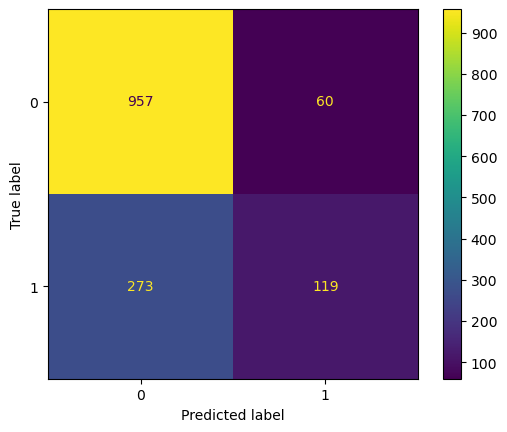

In [101]:
cm = confusion_matrix(y_test, y_pred,labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

# Balancing the data